# Machine Learning 

## Machine learning models

### Decision trees


### Deep learning

**Rephase text, this is from david's ha paper**
**+add the traingle diagram of the data, model, optimisation algo**
Deep learning (DL) is a class of machine learning methods that uses multi-layer (“deep”) neural networks for representation learning. While artificial neural networks, trained with the backpropagation algorithm, first appeared in the 1980s 57, deep neural networks did not receive widespread attention until 2012 when a deep artificial neural network solution trained on GPUs 35 won an annual image recognition competition 15 by a significant margin over the non-DL runner up methods. This success demonstrated that DL, when combined with fast hardware-accelerated implementations and the availability of large datasets, is capable of achieving exceptionally better results in non-trivial tasks than conventional methods. Researchers and practitioners alike soon quickly incorporated DL to address the long-standing problems in several other fields spanning computer vision (CV) 24,47,60, natural language processing (NLP) 5,48,49, reinforcement learning (RL) 37,59,68 and computational biology 32,58, many of which have technological breakthroughs and achieved state-of-the-art results.
**In the current deep learning paradigm, there is an entire ecosystem of tools designed to make it easy to train and deploy neural network models. It is also relatively straightforward to train the parameters of a neural network with deep learning frameworks by providing it with a dataset 9, or a simulated task environment 26. Deep learning tools are designed to be used by anyone with a basic programming background.**
+add now an extension of the holy trinity which incorporate training libraries and hardware "the holy pentagon"


<div align="center">
<p style="text-align:center;"><img src="https://github.com/BergLab/CompNeuroBook/blob/main/notebooks/week4/trianglepentagon.png?raw=true" width="500"/>
</div>


#### MLP

#### Convolutional neural networks 
Convolutional neural networks (CNN), the deep neural network class, that is most commonly applied to image analysis and computer vision applications.

You've heard it before: images are made of pixels, so the CNN leverages the *convolution operation* to calculate latent (hidden) features for different pixels based on their surrounding pixel values. It does this by sliding a kernel (a.k.a. filter) over the input image and calculating the dot product between that small filter and the overlapping image area. This dot product leads to aggregate the neighboring pixel values to one representative scaler. Now let us twist our conceptualization of images a little bit and think of images as a graphs. 

+ add link to visualsation of conv opeartion

#### RNN


## Introduction to Machine learning with scikit-learn

[Scikit-learn](https://scikit-learn.org/stable/tutorial/index.html) is a python library that allows to build many machine learning models with an simple interface. On the other hand, other ML libraries like Pytorch or Tensorflow are focused on machine with neural networks only. 

We will use the same dataset we used on the previous notebook.

### Data description

Each row represent a star.

Feature vectors:

- Temperature -- The surface temperature of the star

- Luminosity -- Relative luminosity: how bright it is

- Size -- Relative radius: how big it is

- AM -- [Absolute magnitude](https://en.wikipedia.org/wiki/Absolute_magnitude): another measure of the star luminosity

- Color -- General Color of Spectrum

- Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants

- Spectral_Class -- O,B,A,F,G,K,M / SMASS - [Stellar classification](https://en.wikipedia.org/wiki/Stellar_classification)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  

The DataFrame can be created from a csv file using the read_csv method. 
If you are working on Colab, you will need to upload the data.

In [2]:
df = pd.read_csv('Stars.csv')
df.head()

,Temperature,Luminosity,Size,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,Red Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,Red Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,Red Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,Red Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,Red Dwarf


## Computing correlations

Let's explore the linear correlations of the data. **Pearson correlation coefficient** $\rho$ is a measure of how linearly correlated two variables are: it's 1 if there is a positive correlation, -1 if negative and zero if none.

<div align="center">
<p style="text-align:center;"><img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png" width="500"/>
</div>


A correlation coefficient tell us how much one variable is related to another or, in other words, how much one variable informs us about the other one. For instance, your height in meters should be perfectly correlated to your height measured in feet $\rho=1$, but your height should not be correlated to how much chocolate you eat when you're feeling sad $\rho=0$.

A correlation is said to be linear if you can convert from variable to other one by using linear transformations only —ie. addition and multiplication but not applying powers or square roots, etc. 

Let's use Scipy to compute the correlations of our data. One of the nice aspects of the Python ecosystem is that data is often interoperable between libraries, here we're gonna load our star data with Pandas and use Scipy to compute the correlations.

Let's start by doing a sanity check, a variable should be VERY correlated to itself, right? Let's plot the temperature against the temperature using a scatter plot:

/Users/enaj/.virtualenvs/p39/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Temperature', ylabel='Temperature'>

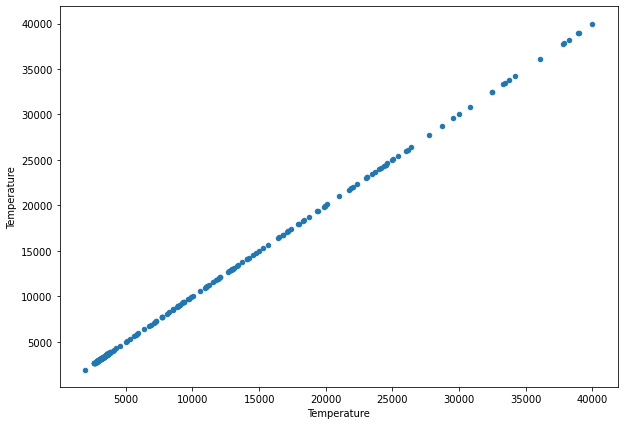

In [3]:
df.plot.scatter('Temperature','Temperature', figsize=(10,7))

What value of the pearson correlation coefficient do expect to have? If it's not obvious to you, think about it before running the next code cell.

In [4]:
from scipy import stats

r, p = stats.pearsonr(df['Temperature'], df['Temperature'])
print(f"The correlation coefficient is {r}")

The correlation coefficient is 1.0


A variable always has correlation coefficient of one with itself. Let's now explore the rest of the data.

#### Exercise

- Find the two pairs of variables with the highest absolute correlation # Hint: You can use Scipy's stats.pearsonr function, otherwise Pandas data frames have a method `corr()` that outputs Pearson correlation between the different variables. # Hint 2 : If you wanna plot you can use `dataframe_name.corr().style.background_gradient(cmap='coolwarm')`

- Once you find the two variables, make their scatter plot again but this apply the logarithmic function `np.log(df['whichever variable'])` before computing the Pearson correlation coefficient again. How does the Pearson correlation coefficient  changes after applying the logarithmic transformation?

### Non-linear correlations

Look at the following figure, the number above each dataset is their Pearson coefficient:

<div align="center">
<p style="text-align:center;"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2880px-Correlation_examples2.svg.png" width="500"/>
</div>


Notice how the data points on the bottom clearly have some correlations, however Pearson tells us it's zero.. That's because they are **non linear** correlations.


There exist *many* types of correlations coefficients we can compute, some of the like Spearman, can even capture non linear correlations. We won't go explore them further here, but be aware that they exist if you ever are suspicious your data may be trying to hide non-linear correlations.

### The relation between correlation coefficients and predictive models

Machine learning models (as any other model) are typically used to connect one variable to another. What happens if these two variables are not correlated? Well then it's simply not possible to build a model predicting one variable as a function of the other. If two variables X and Y are independent —ie. not correlated— that means that knowing X does not provide us any information about Y. The opposite is true, if two quantities are correlated, we should —in principle— be able to build a model linking them.

Now, in most natural phenomena, quantities are high-dimensional and non-linearly correlated so we can't simply predict if we would be able to build a model based on some correlation coefficient. In these cases, training and evaluating the model is the only way of looking for correlations.


## Supervised Learning

Supervised learning (SL) is the most common type of task in machine learning. It consist in finding a function that maps on space onto another, eg. the size of star to its luminosity. It can sub-divide into two types of task: regression and classification. 

### Regression

Let's start by performing a regression (mapping one continual variable onto another one) on fake data so we make sure our set-up allows us to train models properly. We will generate the values from a sine function and train a neural network on them. Read the code line by line and make sure you understand what's going on.

Score on training:  0.9993426972249772


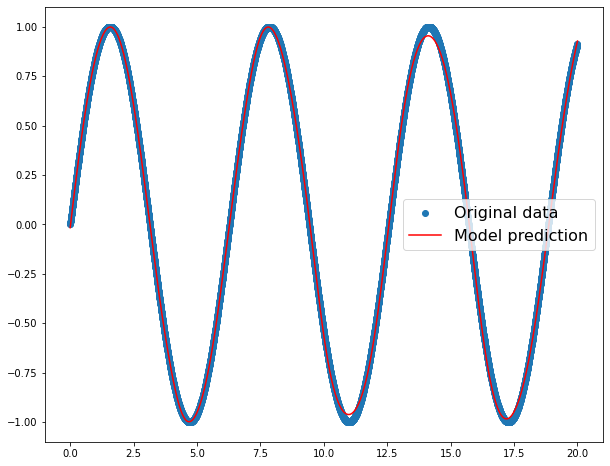

In [5]:
from sklearn.neural_network import MLPRegressor

# Generate data
X = np.linspace(0,20,5000).reshape(-1,1)  # X : a set of equally space between 0 and 50
Y = np.sin(X)                              # Y : the sine function for the X values

# Define neural network model
model = MLPRegressor(max_iter=200, # Maximum number of steps we update our model
                    activation="tanh",   # activation function
                    early_stopping=True,  # Should the training stop if loss converges? 
                    hidden_layer_sizes=(100,100), # Hidden layers size
                    )

# Train model by calling the .fit() method
model.fit(X, Y.ravel()) 

# Print Score: a score of 1 is a perfect fit
print('Score on training: ', model.score(X, Y))

# Predict data values with model and plot along original data
plt.figure(figsize=(10,8))
plt.scatter(X,Y, label='Original data')
input_x = np.linspace(X.min(), X.max(), 10000).reshape(-1,1)
pred_y = model.predict(input_x)
plt.plot(input_x,pred_y, label='Model prediction', color='red')
plt.legend(fontsize=16)

It seems to be working, the score should be close to 1.0 —which would be a perfect fit.

#### Exercise

- Extend the plot of the model we just trained so it predicts values outside of the range of those we used to train it. Does it still perform well on that range?

In [6]:
## Your code here

### Real data

Moving on onto real data. Both the *Luminosity* and *Absolute Magnitude* relate to how bright a star is. Let's try to figure out what the exact relation between them is. Let's plot them.

/Users/enaj/.virtualenvs/p39/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Luminosity', ylabel='A_M'>

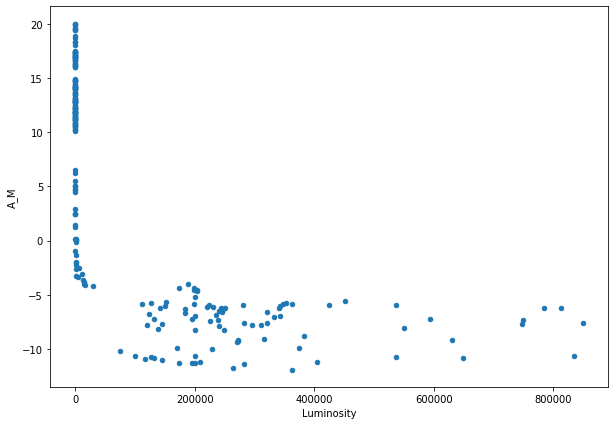

In [7]:
df.plot.scatter('Luminosity','A_M', figsize=(10,7))

As you already knew, there is indeed a strong correlation between these two variables. You could even try to guess what the analytical formula is given the shape —or google it— but rather let's see if we can instead build a model to predict the absolute magnitude for each luminosity. We could try a linear model but the relation is not quite linear, is it? Ie. it's not a straight line. We could also try to fit a polynomial or a logarithmic function.. Instead we will build a neural network model so we don't need to make any assumption about the relation between the variables.

We first need to import the library and models we are going to use:

In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

We start by selecting the data and splitting it between **training** and **test** sets:

In [9]:
X = df['Luminosity'].values.reshape(-1,1) # Sklearn likes input data be given in a specific shape, don't worry too much about the reshape
Y = df['A_M'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

We the initialise the model that we are going to train. We are gonna use a neural network, Sklearn deals with the details of making the neural network of the correct size for our data:

In [10]:
model = MLPRegressor(max_iter=1000, # Maximum number of steps we update our model
                    activation="tanh", # activation function
                    early_stopping=False, # Should the training stop if loss converges? 
                    hidden_layer_sizes=(300,300,300), # Hidden layers size
                    learning_rate_init=0.00005, # learning rate
                    learning_rate = 'adaptive',
                    )

Then, we simply need to call the method `.fit()` to train the model.

In [11]:
model.fit(X_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(300, 300, 300),
             learning_rate='adaptive', learning_rate_init=5e-05, max_iter=1000)

Let's print the score:

In [12]:
print('Score on training set: ', model.score(X_train, y_train))
print('Score on test set: ', model.score(X_test, y_test))

Score on training set:  0.9074042384440644
Score on test set:  0.9609682762030545


Finally, let's print our the data along with the values predicted by the model. We generate a set of luminosity values `input_x` and use the method `model.prediction()` to use our trained model to predict values.

/Users/enaj/.virtualenvs/p39/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


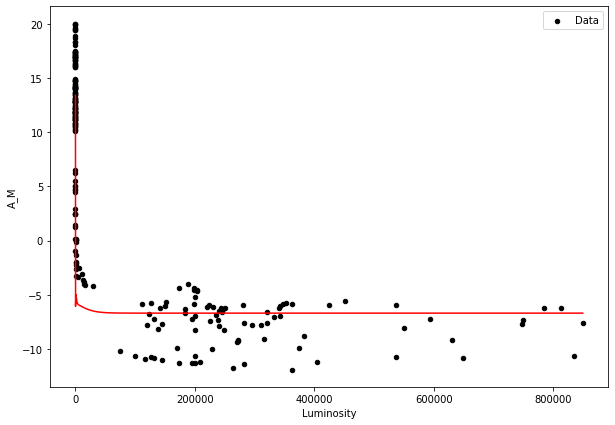

In [13]:
df.plot.scatter('Luminosity','A_M', figsize=(10,7), label='Data', color='black')
input_x = np.linspace(0, X.max(), 100000).reshape(-1,1)
pred_y = model.predict(input_x)
plt.plot(input_x,pred_y, label='Model prediction', color='red')

Congratulations, you just trained your first neural network on real data! The red line should hopefully fit the dataset points.

#### Exercise

- Train a neural network model to predict the absolute magnitude of the stars based on their temperature and size. Leave out 20% of the data as test set and evaluate the accuracy of the trained model on both the training set and the test set.
- Change the ratio of training vs test set. How does this affect the accuracy of the model?

In [14]:
## Your code here

### Classification 

Our dataset contains a categorical variable "Spectral Class". This variable represents the color of the star. Let's see if we could predict the spectral class of the stars based on the other features of the dataset.

Let's visualise how many stars of each type there are in the data. If the amount of stars of one category was very small and another one too big, it would make the training quite difficult since the model would just learn to predict those over-represented in the data:

<AxesSubplot: ylabel='None'>

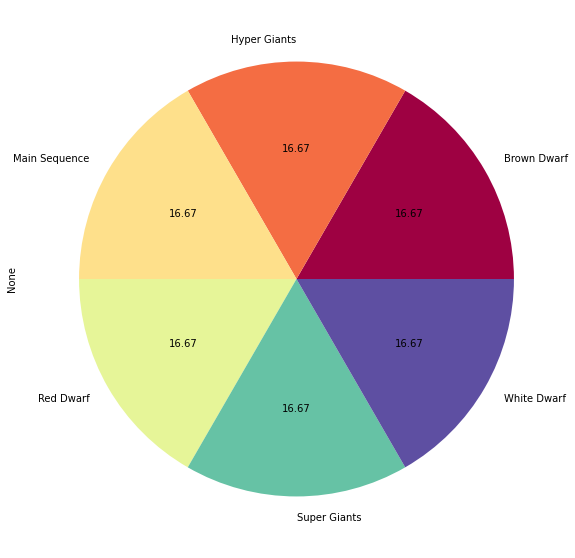

In [15]:
from matplotlib import cm
df.groupby('Type').size().plot(kind='pie', autopct='%.2f', figsize=(10,10), cmap=cm.get_cmap('Spectral'))

It seems the data is balanced with respect to stars types so we can safely move on.
Let's now visualise how the different variables relate to each other so we can pick features that would allow us to separate the stars based on their type:

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

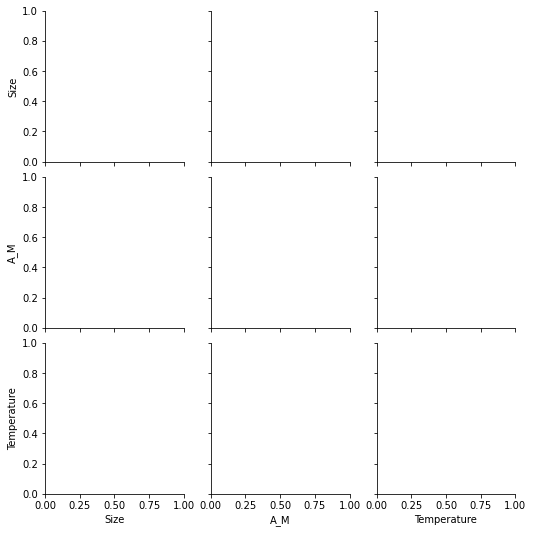

In [16]:
import seaborn # seaborn is a library similar to matplotlib but with some extra features and nicer default color schemes

features = ['Size', 'A_M', 'Temperature', 'Type']
seaborn.pairplot(df[features], hue="Type", palette="husl")



We start by selecting the data that we are gonna feed our model —the input— and the data that we want our model to predict —ie. to output—. In our case, we're gonna try to predict the star type (White Dwarf, Super giants..) based on their temperature and absolute magnitude.

 and the data that we want our model to predict —ie. to output—. In our case, we're gonna try to predict the star type (White Dwarf, Super giants..) based on their temperature and absolute magnitude.

In [ ]:
feature_cols = ['Temperature', 'A_M']
target_feature = 'Type'
X = df[feature_cols].values # 
Y = df[target_feature].values

We split the data between training data and test data:

In [ ]:
random_seed = 9716 # This allow us to have reproducible results since both the splitting and training have stochastic component
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_seed)

We can now train the model, we are going to use a neural network model `MLPClassifier`. So like usual, we import it and define its parameters:

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='adam', 
                    hidden_layer_sizes=(300,300,300), 
                    activation='tanh',
                    max_iter=10000,
                    learning_rate = 'adaptive',
                    learning_rate_init=0.00005,
                    early_stopping=False,
                    random_state = random_seed)

All that's left is to train it by calling the `.fit()` method on the model. Beware, this might take some point to run.

In [ ]:
model.fit(X_train, y_train)

print('Accuracy on training: ', model.score(X_train, y_train))
print('Accuracy on test: ', model.score(X_test, y_test))

Since we are making predictions based on only two dimensions (temperature and absolute magnitude) we can make a figure with the decision boundaries for our model. To do so, we use Scikit-learn `DecisionBoundaryDisplay` function. ⚠️ Sadly, Google Colab doesn't run the last version of Scipy which implements the `DecisionBoundaryDisplay` function. You will have to run this part locally on your computer or come talk to use to see what it looks like and just skip it.


In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(16,12))

DecisionBoundaryDisplay.from_estimator(
    model, # the model we just train
    X,     # the feature vectors we used to train the model
    cmap = 'Set3', 
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel=feature_cols[0],
    ylabel=feature_cols[1],
    eps=0.5,
)

# We plot the stars with each type on a different color
colors = plt.cm.get_cmap('hsv', len(df[target_feature].unique()))
for index, startype in enumerate(df[target_feature].unique()):
    stars_one_type = df[df[target_feature] == startype][feature_cols].values
    plt.scatter(stars_one_type[:, 0], stars_one_type[:, 1], color = colors(index), edgecolors="k", label=startype)

plt.legend(fontsize=12)
plt.show()

#### Exercise

- Use the `predict()` method of the model we just trained to predict the category of the stars with the following temperatures and absolute magnitude. Check that the predictions are compatible with those found in the Hertzsprung-Russell Diagram below. # Hint: you'll need to add extra pair of brackets `[[temperature value, absolute magnitude]]` when calling the predict method of the model.

<div align="center">

| Temperature | Absolute Magnitude |
| --- | ----------- |
| 7000 | 14 |
| 8000 | 4 |
| 4000 | -7 |
</div>


<p style="text-align:center;"><img src="https://upload.wikimedia.org/wikipedia/commons/7/78/H-R_diagram_-edited-3.gif" width="500"/>

In [ ]:
## Your code here

- Train a neural network model to predict the Spectral Class of the stars, compute its accuracy and plot the decision boundaries (if you're working locally). You can decide on which feature vectors you want to train the model as well as the size of your neural network model (argument `hidden_layer_sizes` in the model definition). # Hint: ML models models require manually tweaking the parameters, play with different network sizes until you get a good performance.

In [ ]:
## Your code here

## Bonus: Clustering

Cluster analysis or clustering consist in grouping objects such that the distance between similar objects is small while the distance between different objects is big. When objects are represented by high-dimensional data —think for instance of cell types represented by their proteomics or stars represented by their physical properties—, then the task of clustering becomes challenging. 

Humans are great, but they have not evolved to easily understand and visualise high-dimensional data. To compensate this shortcoming, a first step when looking to cluster data is to *reduce its dimensionality*, meaning that we find some representation of the data in 2 or 3 dimension such that we obtain meaningful clusters.

The downside of performing dimensionality reduction is that there exist different low-dimensional representations of the same data. Therefore, finding which features of the data are relevant and how to project them to a low dimensional space is critical.

In the previous notebook, you have already done some manual clustering of some of the stars by simply selecting some range of the features —eg. temperature > 5000, certain luminosity, etc.— In this section we are gonna explore less manual approaches. Scikit-learn provides for [a number of clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html), with [K-Means](https://scikit-learn.org/stable/modules/clustering.html#k-means) being the go-to clustering method. K-Means computes clusters based on the similarity of the feature vectors.